# Análisis de Datos Financieros del S&P 500 (2014-2017)

Este notebook presenta un análisis exhaustivo del histórico de precios de acciones del índice S&P 500 durante el periodo 2014-2017. El análisis incluye estadísticas descriptivas, visualizaciones de rendimiento, análisis por sectores y simulaciones de inversión.

**Dataset**: Histórico de precios de acciones del S&P 500  
**Variables**: `symbol`, `date`, `open`, `high`, `low`, `close`, `volume`  
**Periodo**: 2014-2017

In [1]:
# 1. Imports & configuración
import sys
import os

# Añadimos la carpeta raíz al sistema para poder importar desde 'src'
sys.path.append(os.path.abspath(os.path.join('..')))

# Dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Importar funciones propias
from src.loader import load_and_clean_data, filter_by_period
from src.metrics import calculate_returns, get_global_stats, analyze_by_symbol

## 2. Carga de Datos

Cargamos el dataset desde el archivo CSV y convertimos la columna de fecha al tipo datetime. Además, realizamos una primera exploración para comprender la estructura y tipos de datos.

In [2]:
# 2. Carga de datos
# 2.1 Leer el archivo CSV (‘symbol’, ‘date’, ‘open’, ‘high’, ‘low’, ‘close’, ‘volume’)
# 2.2 Convertir date al tipo datetime
ruta_csv = '../data/S&P_500_Stock_Prices_2014-2017.csv'
df = load_and_clean_data(ruta_csv)

# 2.3 Mostrar df.head(), df.info(), df.describe() para entender estructura y tipos
print("\n- Primeras filas -")
display(df.head())

print("- Información del Dataset -")
df.info()

print("- Estadísticas Descriptivas -")
display(df.describe())


- Primeras filas -


,symbol,date,open,high,low,close,volume
57,A,2014-01-02,57.10,57.100,56.15,56.21,1916160
540,A,2014-01-03,56.39,57.345,56.26,56.92,1866651
1023,A,2014-01-06,57.40,57.700,56.56,56.64,1777472
1506,A,2014-01-07,56.95,57.630,56.93,57.45,1463208
1989,A,2014-01-08,57.33,58.540,57.17,58.39,2659468


- Información del Dataset -
<class 'pandas.core.frame.DataFrame'>
Index: 497461 entries, 57 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497461 non-null  object        
 1   date    497461 non-null  datetime64[ns]
 2   open    497461 non-null  float64       
 3   high    497461 non-null  float64       
 4   low     497461 non-null  float64       
 5   close   497461 non-null  float64       
 6   volume  497461 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 30.4+ MB
- Estadísticas Descriptivas -


,date,open,high,low,close,volume
count,497461,497461.000000,497461.000000,497461.000000,497461.000000,4.974610e+05
mean,2016-01-06 17:16:56.524310784,86.352275,87.132717,85.552616,86.368586,4.253695e+06
min,2014-01-02 00:00:00,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,2015-01-08 00:00:00,41.690000,42.090000,41.280000,41.700000,1.080183e+06
50%,2016-01-11 00:00:00,64.970000,65.560000,64.357400,64.980000,2.085013e+06
75%,2017-01-06 00:00:00,98.410000,99.230000,97.580000,98.420000,4.271999e+06
max,2017-12-29 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,101.471228,102.312340,100.571231,101.471516,8.232210e+06


## 3. Limpieza y Preparación de Datos

Realizamos la limpieza de datos, verificando valores nulos y asegurando tipos correctos. Calculamos también columnas adicionales para el análisis de rendimientos diarios y acumulados.

In [3]:
# 3. Limpieza y preparación de datos
# 3.1 Verificar valores nulos o datos faltantes (Ya lo hace load_and_clean_data internamente)
# 3.2 Asegurar que close, open, volume están como tipos numéricos (Hecho en loader)
# 3.3 Ordenar los datos por symbol y date (Hecho en loader)

# 3.4 - 3.6 Crear columnas nuevas útiles: Rendimiento diario simple y Rendimiento acumulado
df = calculate_returns(df)

# 3.7 Filtrar fechas, símbolos o periodos para análisis
# Ejemplo 1: Filtrar por periodo (2015) (usando la función que creamos en loader.py)
df_2015 = filter_by_period(df, '2015-01-01', '2015-12-31')
print(f"Registros en 2015: {len(df_2015)}")

# Ejemplo 2: Filtrar por un símbolo específico
df_apple = df[df['symbol'] == 'AAPL']
print(f"Registros de AAPL: {len(df_apple)}")

display(df_apple.head())

Registros en 2015: 123713
Registros de AAPL: 1007


,symbol,date,open,high,low,close,volume,return_daily,return_cumulative
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,NaN,0.000000
484,AAPL,2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870,-2.196574,-2.196574
967,AAPL,2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151,0.545270,-1.663281
1450,AAPL,2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766,-0.715663,-2.367041
1933,AAPL,2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685,0.633846,-1.748198


## 4. Análisis Exploratorio

### 4.1 Estadísticas Globales

Analizamos las estadísticas generales del dataset, incluyendo el número total de registros, símbolos únicos y métricas de rendimiento diario.

In [4]:
# 4. Análisis exploratorio

# 4.1 Estadísticas globales
# 4.1.1 Número total de registros, número de símbolos (symbol)
# 4.1.2 Estadísticas de rendimiento diario (return_daily): media, mediana, desviación estándar
# 4.1.3 Volumen medio de negociación
global_stats = get_global_stats(df)
print("- Estadísticas globales -")
for key, val in global_stats.items():
    print(f"{key}: {val}")

# 4.2 Distribución de rendimientos por símbolo
# 4.2.1 - 4.2.4 Agrupar por symbol para calcular: rendimiento medio diario, volatilidad diaria, crecimiento acumulado
# 4.2.5 Ordenar símbolos por rendimiento acumulado
summary = analyze_by_symbol(df)
print("\n- Top 10 Símbolos por rendimiento acumuilado -")
display(summary.head(10))

- Estadísticas globales -
total_records: 497461
num_symbols: 505
mean_return: 0.04601595392768425
median_return: 0.05812263876781021
standar_deviation: 1.6285337426885724
mean_volume: 4253694.672418541

- Top 10 Símbolos por rendimiento acumuilado -


,symbol,mean_daily_return,volatility,cumulative_return
346,NVDA,0.276020,2.373885,1120.050441
53,AVGO,0.177969,2.023737,387.939221
153,EA,0.169227,1.889932,360.183968
26,ALGN,0.154462,1.960721,290.080758
334,NFLX,0.165104,2.658549,270.354650
51,ATVI,0.141883,1.871837,250.415053
292,LUV,0.140211,1.817116,246.663136
429,SWKS,0.148829,2.249636,246.532847
173,EW,0.139487,1.859812,241.959951
108,CNC,0.144794,2.111690,241.734417


### 4.2 Correlación entre empresas

 En esta sección veremos cuales son las empresas con mayor correlación entre sí, es decir, los cuales movimientos son muy similares.

C:\Users\yutsin\AppData\Local\Temp\ipykernel_39368\1148840702.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = precios.pct_change().dropna(how='all')


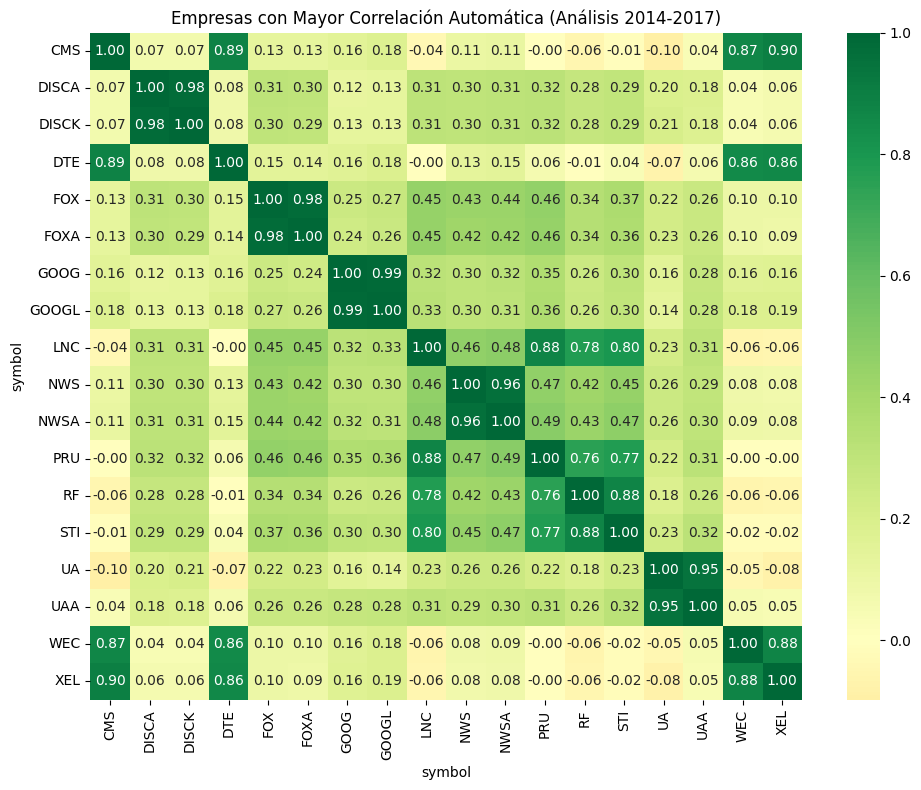

Parejas más correlacionadas detectadas:
symbol  symbol
GOOG    GOOGL     0.988657
DISCA   DISCK     0.980674
FOX     FOXA      0.977048
NWS     NWSA      0.961363
UA      UAA       0.951340
CMS     XEL       0.897617
        DTE       0.887714
LNC     PRU       0.878897
RF      STI       0.878511
WEC     XEL       0.876993
dtype: float64


In [5]:


# 2. Preparar los datos
# Pivotamos y eliminamos columnas con demasiados valores nulos para un cálculo limpio
precios = df.pivot(index='date', columns='symbol', values='close')
retornos = precios.pct_change().dropna(how='all')

# 3. Calcular la matriz de correlación
corr_matrix = retornos.corr()

# 4. ENCONTRAR LAS MÁS CORRELACIONADAS (Lógica corregida)
# Creamos una máscara para ignorar la diagonal (correlación de una empresa consigo misma) 
# y la mitad inferior (que es un espejo de la superior)
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
sol = corr_matrix.where(mask).stack().sort_values(ascending=False)

# 5. Seleccionar las top empresas
# Tomamos las primeras 10 parejas con mayor correlación
top_pairs = sol.head(10)
# Extraemos los nombres de las empresas involucradas en esas parejas
top_symbols = sorted(list(set([symbol for pair in top_pairs.index for symbol in pair])))

# 6. Filtrar y graficar
final_corr = corr_matrix.loc[top_symbols, top_symbols]

plt.figure(figsize=(10, 8))
sns.heatmap(final_corr, annot=True, cmap='RdYlGn', center=0, fmt=".2f")
plt.title('Empresas con Mayor Correlación Automática (Análisis 2014-2017)')
plt.tight_layout()
plt.show()

print("Parejas más correlacionadas detectadas:")
print(top_pairs)

### 4.3 Gráficos de Evolución y Rentabilidad

En esta sección visualizamos la evolución temporal de los precios y rendimientos acumulados de diferentes empresas, así como la distribución de los rendimientos diarios.

Analizando símbolos: NVDA, AVGO, EA, ALGN, NFLX


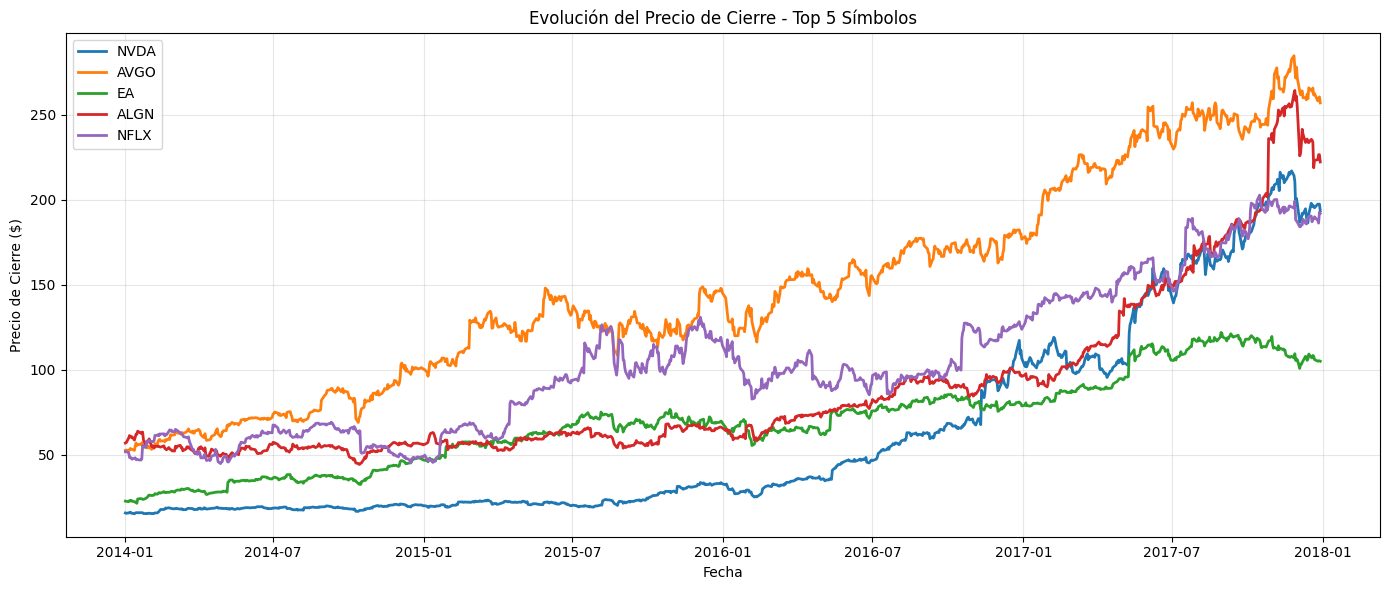

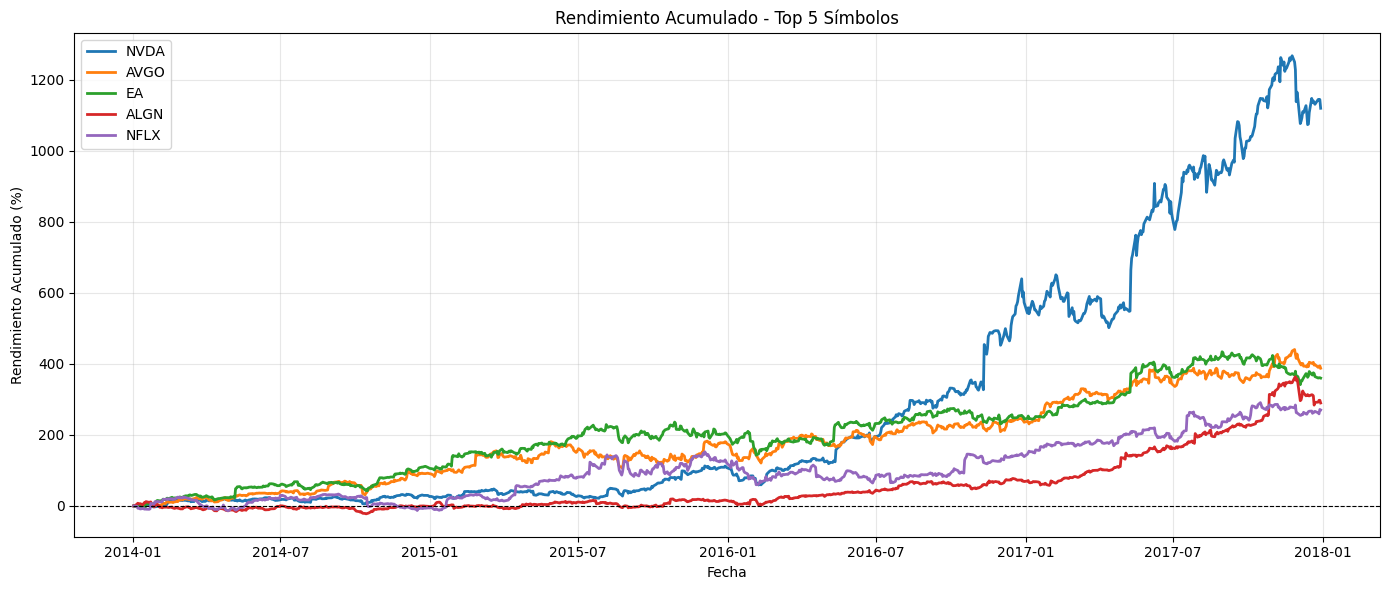

In [6]:
# Seleccionar 5 símbolos para comparar su evolución
top_symbols = summary.head(5)['symbol'].values
print(f"Analizando símbolos: {', '.join(top_symbols)}")

# Gráfica de evolución del precio de cierre
plt.figure(figsize=(14, 6))
for symbol in top_symbols:
    df_symbol = df[df['symbol'] == symbol].sort_values('date')
    plt.plot(df_symbol['date'], df_symbol['close'], label=symbol, linewidth=2)

plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.title('Evolución del Precio de Cierre - Top 5 Símbolos')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfica de rendimiento acumulado
plt.figure(figsize=(14, 6))
for symbol in top_symbols:
    df_symbol = df[df['symbol'] == symbol].sort_values('date')
    plt.plot(df_symbol['date'], df_symbol['return_cumulative'], label=symbol, linewidth=2)

plt.xlabel('Fecha')
plt.ylabel('Rendimiento Acumulado (%)')
plt.title('Rendimiento Acumulado - Top 5 Símbolos')
plt.legend()
plt.grid(alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

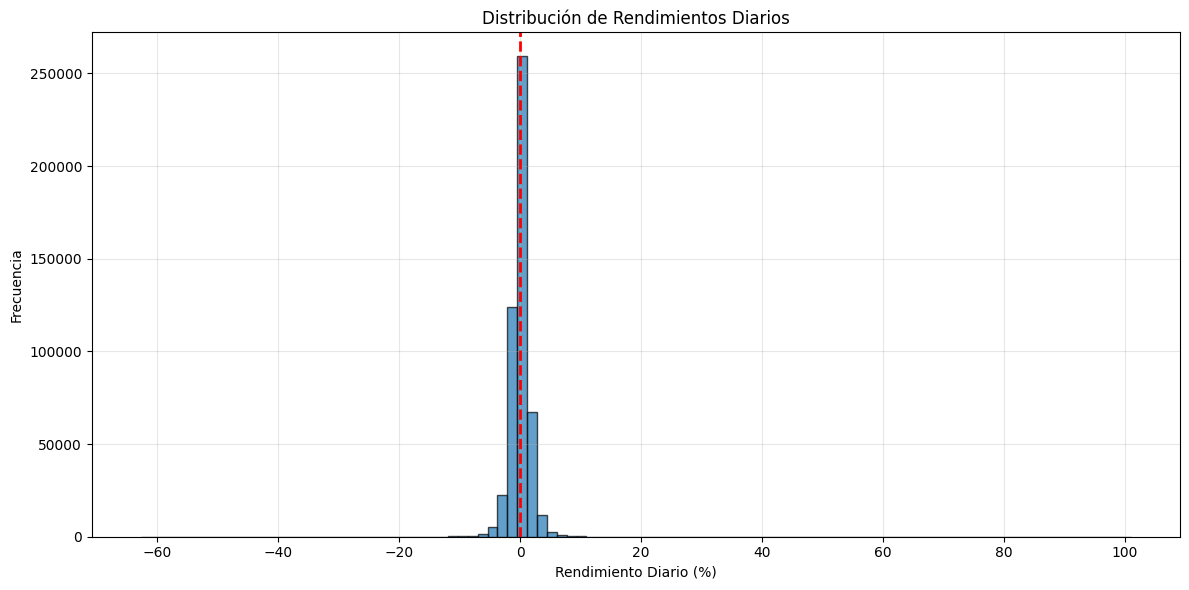

Media de rendimiento diario: 0.0460%
Mediana de rendimiento diario: 0.0581%
Desviación estándar: 1.6285%


In [7]:
# Histograma de rendimientos diarios
plt.figure(figsize=(12, 6))
df['return_daily'].hist(bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Rendimiento Diario (%)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Rendimientos Diarios')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Media de rendimiento diario: {df['return_daily'].mean():.4f}%")
print(f"Mediana de rendimiento diario: {df['return_daily'].median():.4f}%")
print(f"Desviación estándar: {df['return_daily'].std():.4f}%")

### 4.4 Comparación entre Símbolos

Comparamos el crecimiento acumulado de múltiples símbolos y analizamos la relación entre rendimiento y volatilidad para identificar patrones de riesgo-retorno.

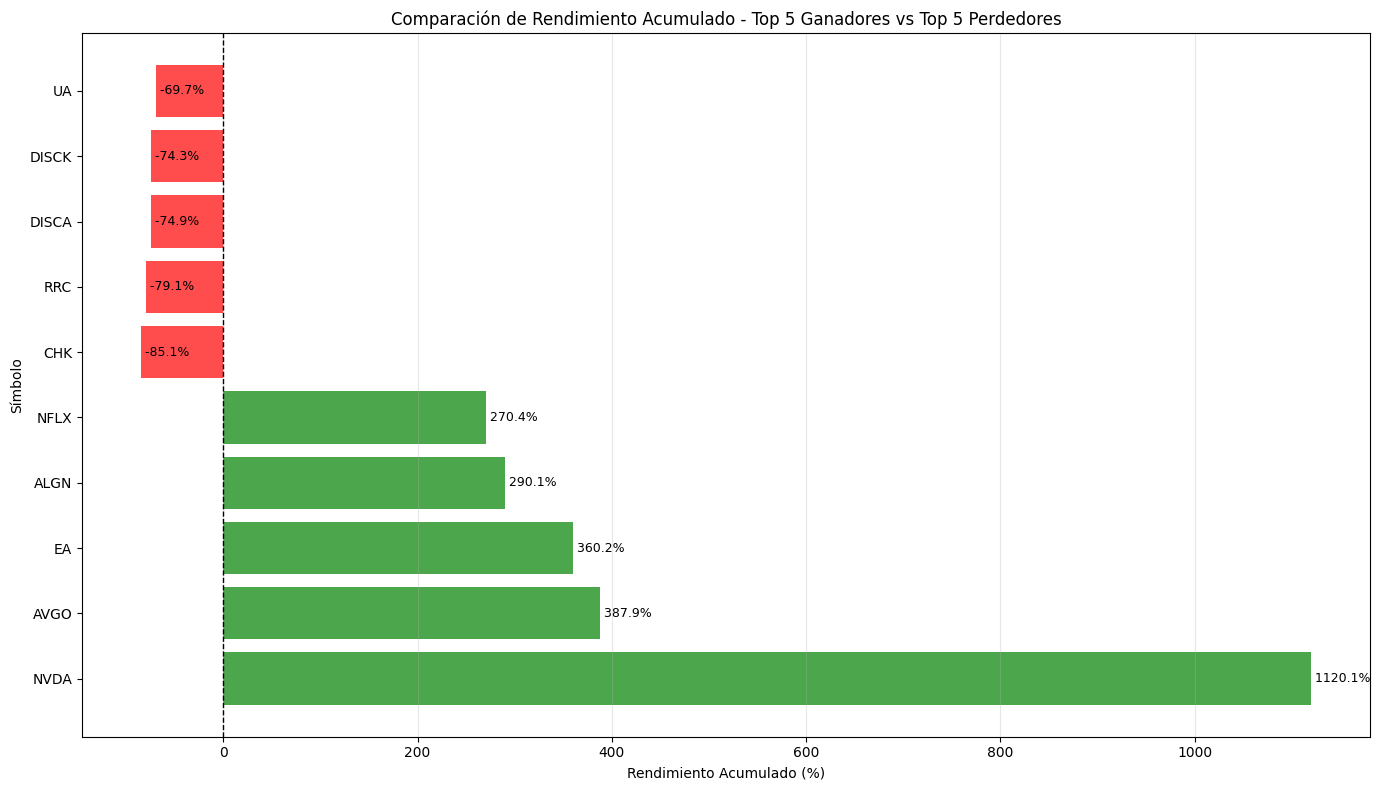

In [8]:
# Seleccionar 10 símbolos (top 5 ganadores y top 5 perdedores)
top_10_winners = summary.nlargest(5, 'cumulative_return')
top_10_losers = summary.nsmallest(5, 'cumulative_return')
comparison_symbols = pd.concat([top_10_winners, top_10_losers])

# Gráfica comparativa
fig, ax = plt.subplots(figsize=(14, 8))
colors = ['green' if x > 0 else 'red' for x in comparison_symbols['cumulative_return']]
ax.barh(comparison_symbols['symbol'], comparison_symbols['cumulative_return'], color=colors, alpha=0.7)
ax.set_xlabel('Rendimiento Acumulado (%)')
ax.set_ylabel('Símbolo')
ax.set_title('Comparación de Rendimiento Acumulado - Top 5 Ganadores vs Top 5 Perdedores')
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(comparison_symbols.iterrows()):
    ax.text(row['cumulative_return'], i, f" {row['cumulative_return']:.1f}%", 
            va='center', fontsize=9)

plt.tight_layout()
plt.show()

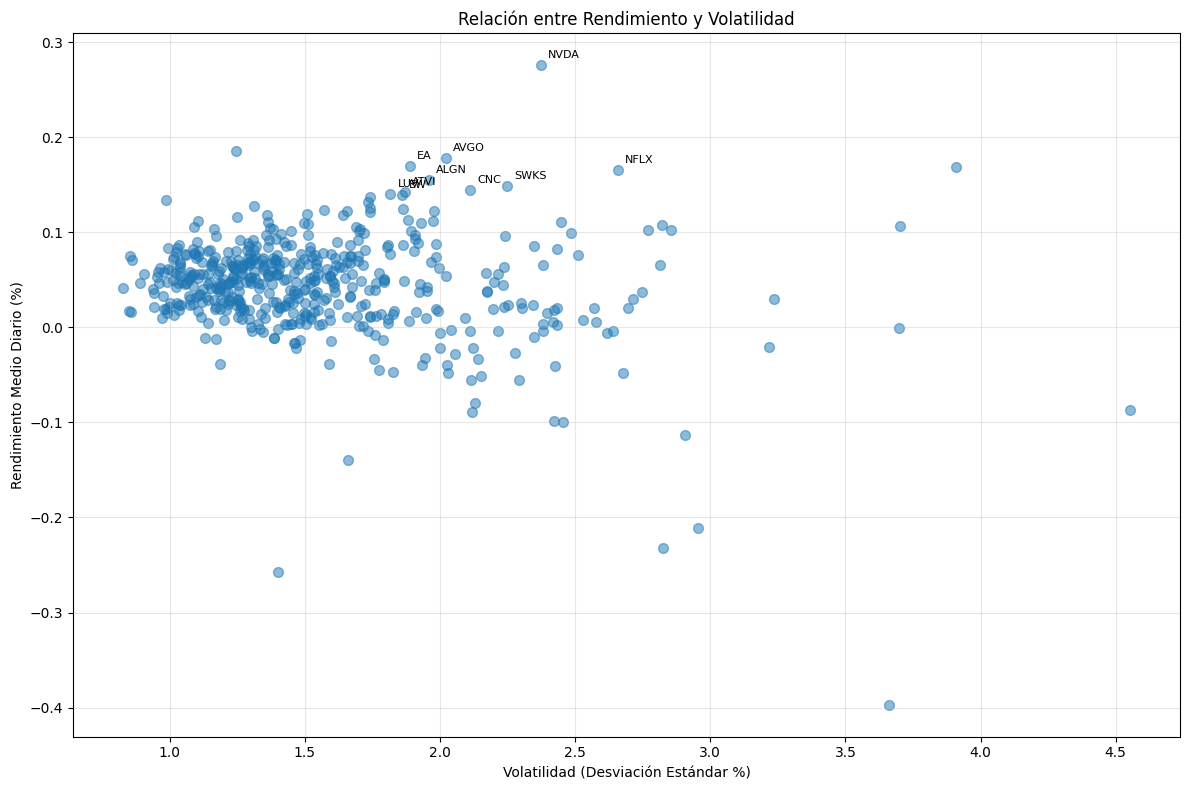


Observación: En general, los símbolos con mayor rendimiento tienden a tener mayor volatilidad,
lo que confirma la relación clásica de riesgo-retorno en finanzas.


In [9]:
# Análisis de la relación rendimiento-volatilidad
plt.figure(figsize=(12, 8))
plt.scatter(summary['volatility'], summary['mean_daily_return'], alpha=0.5, s=50)
plt.xlabel('Volatilidad (Desviación Estándar %)')
plt.ylabel('Rendimiento Medio Diario (%)')
plt.title('Relación entre Rendimiento y Volatilidad')
plt.grid(alpha=0.3)

# Anotar algunos símbolos destacados
top_10_all = summary.nlargest(10, 'cumulative_return')
for idx, row in top_10_all.iterrows():
    plt.annotate(row['symbol'], 
                xy=(row['volatility'], row['mean_daily_return']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

print("\nObservación: En general, los símbolos con mayor rendimiento tienden a tener mayor volatilidad,")
print("lo que confirma la relación clásica de riesgo-retorno en finanzas.")

## 5. Uso de NumPy para Análisis Auxiliar

NumPy nos permite realizar cálculos eficientes sobre arrays, lo cual es útil para verificar nuestros cálculos de rendimientos y explorar distribuciones estadísticas.

In [10]:
# Calcular rendimientos usando np.diff() manualmente para un símbolo
symbol_test = 'AAPL'
df_test = df[df['symbol'] == symbol_test].sort_values('date').copy()
prices = df_test['close'].values

# Calcular rendimientos con NumPy
returns_numpy = (np.diff(prices) / prices[:-1]) * 100

print(f"Rendimientos calculados con NumPy para {symbol_test}:")
print(f"  Primeros 10 valores: {returns_numpy[:10]}")
print(f"  Media: {np.mean(returns_numpy):.4f}%")
print(f"  Desviación estándar: {np.std(returns_numpy):.4f}%")

Rendimientos calculados con NumPy para AAPL:
  Primeros 10 valores: [-2.19657422  0.5452701  -0.71566273  0.63384581 -1.27722442 -0.66709722
  0.52354921  1.98973512  2.00779957 -0.558006  ]
  Media: 0.0860%
  Desviación estándar: 1.4302%


In [11]:
# Calcular percentiles de rendimiento diario
percentiles = [5, 25, 50, 75, 95]
percentile_values = np.percentile(df['return_daily'].dropna(), percentiles)

print("\nPercentiles de Rendimiento Diario:")
for p, val in zip(percentiles, percentile_values):
    print(f"  Percentil {p}: {val:.4f}%")

# Calcular días que superan el percentil 95
p95 = percentile_values[-1]
days_above_p95 = (df['return_daily'] > p95).sum()
total_days = df['return_daily'].notna().sum()

print(f"\nDías que superan el percentil 95 ({p95:.4f}%): {days_above_p95} de {total_days} ({days_above_p95/total_days*100:.2f}%)")


Percentiles de Rendimiento Diario:
  Percentil 5: -2.3228%
  Percentil 25: -0.6814%
  Percentil 50: 0.0581%
  Percentil 75: 0.7995%
  Percentil 95: 2.3425%

Días que superan el percentil 95 (2.3425%): 24848 de 496956 (5.00%)


In [12]:
# Usar np.cumprod() para calcular crecimiento de inversión
# Si invertimos $100 en AAPL al inicio, ¿cuánto tendríamos al final?
initial_investment = 100
df_apple_sorted = df[df['symbol'] == 'AAPL'].sort_values('date').copy()

# Calcular factores de crecimiento (1 + rendimiento/100)
growth_factors = 1 + (df_apple_sorted['return_daily'].fillna(0) / 100)

# Calcular valor de la inversión usando cumprod
investment_value = initial_investment * np.cumprod(growth_factors.values)

print(f"\nSimulación de inversión en AAPL:")
print(f"  Inversión inicial: ${initial_investment:.2f}")
print(f"  Valor final: ${investment_value[-1]:.2f}")
print(f"  Ganancia: ${investment_value[-1] - initial_investment:.2f}")
print(f"  Rendimiento total: {((investment_value[-1] / initial_investment) - 1) * 100:.2f}%")


Simulación de inversión en AAPL:
  Inversión inicial: $100.00
  Valor final: $214.17
  Ganancia: $114.17
  Rendimiento total: 114.17%


## 6. Respuestas a Preguntas Clave

En esta sección respondemos a las preguntas más importantes sobre el análisis del dataset.

In [13]:
# Pregunta 1: ¿Qué símbolo tiene el mayor y menor rendimiento acumulado?
max_return_row = summary.loc[summary['cumulative_return'].idxmax()]
min_return_row = summary.loc[summary['cumulative_return'].idxmin()]

print("=" * 80)
print("RESPUESTAS A PREGUNTAS CLAVE")
print("=" * 80)

print(f"\n1. Rendimiento Acumulado:")
print(f"   Mayor: {max_return_row['symbol']} con {max_return_row['cumulative_return']:.2f}%")
print(f"   Menor: {min_return_row['symbol']} con {min_return_row['cumulative_return']:.2f}%")

RESPUESTAS A PREGUNTAS CLAVE

1. Rendimiento Acumulado:
   Mayor: NVDA con 1120.05%
   Menor: CHK con -85.12%


In [14]:
# Pregunta 2: ¿Qué símbolo tiene la mayor y menor volatilidad?
max_vol_row = summary.loc[summary['volatility'].idxmax()]
min_vol_row = summary.loc[summary['volatility'].idxmin()]

print(f"\n2. Volatilidad Diaria:")
print(f"   Mayor: {max_vol_row['symbol']} con {max_vol_row['volatility']:.4f}%")
print(f"   Menor: {min_vol_row['symbol']} con {min_vol_row['volatility']:.4f}%")


2. Volatilidad Diaria:
   Mayor: CHK con 4.5515%
   Menor: PEP con 0.8284%


In [15]:
# Pregunta 3: Rendimiento medio vs mediana
mean_daily_all = df['return_daily'].mean()
median_daily_all = df['return_daily'].median()

print(f"\n3. Rendimiento Diario Global:")
print(f"   Media: {mean_daily_all:.4f}%")
print(f"   Mediana: {median_daily_all:.4f}%")
print(f"   Diferencia: {mean_daily_all - median_daily_all:.4f}%")
print(f"\n   Interpretación: La diferencia entre media y mediana indica que la distribución")
print(f"   de rendimientos tiene sesgo. Si la media es mayor que la mediana, hay valores")
print(f"   extremos positivos que elevan el promedio.")


3. Rendimiento Diario Global:
   Media: 0.0460%
   Mediana: 0.0581%
   Diferencia: -0.0121%

   Interpretación: La diferencia entre media y mediana indica que la distribución
   de rendimientos tiene sesgo. Si la media es mayor que la mediana, hay valores
   extremos positivos que elevan el promedio.


In [16]:
# Pregunta 4: Percentil 95 para un símbolo seleccionado
selected_symbol = 'AAPL'
df_selected = df[df['symbol'] == selected_symbol]['return_daily'].dropna()
p95_selected = np.percentile(df_selected, 95)
days_above = (df_selected > p95_selected).sum()
total_days_selected = len(df_selected)

print(f"\n4. Percentil 95 para {selected_symbol}:")
print(f"   Valor del percentil 95: {p95_selected:.4f}%")
print(f"   Días que superan este valor: {days_above} de {total_days_selected}")
print(f"   Porcentaje: {days_above/total_days_selected*100:.2f}%")

print("\n" + "=" * 80)


4. Percentil 95 para AAPL:
   Valor del percentil 95: 2.1753%
   Días que superan este valor: 51 de 1006
   Porcentaje: 5.07%



## 7. Análisis por Sectores

Ahora analizamos el crecimiento de las empresas agrupadas por sectores económicos. Esto nos permite identificar qué industrias tuvieron mejor desempeño durante el periodo 2014-2017.

In [17]:
# Importar funciones de análisis por sectores
import sys
sys.path.append('..')
from src.sectors import load_data, get_companies_by_sector, calculate_sector_growth, plot_sector_growth, plot_sector_composition

# Cargar datos y calcular crecimiento por sector
df_sectors = load_data('../data/S&P_500_Stock_Prices_2014-2017.csv')
sector_dict = get_companies_by_sector(df_sectors)
sector_growth = calculate_sector_growth(df_sectors, sector_dict)

print("Crecimiento por Sector:")
print(sector_growth[['sector', 'growth_percent', 'num_companies']].to_string(index=False))

Crecimiento por Sector:
                   sector  growth_percent  num_companies
                 Finanzas       83.393074             50
     Consumo Discrecional       81.404676             42
               Tecnología       73.251727             37
Servicios de Comunicación       61.969350             20
                    Salud       53.827474             48
             Inmobiliario       38.867427             24
           Consumo Básico       33.134054             30
       Servicios Públicos       27.018065             25
               Materiales       12.600389             22
                Industria        6.288980             46
                  Energía      -23.084121             22


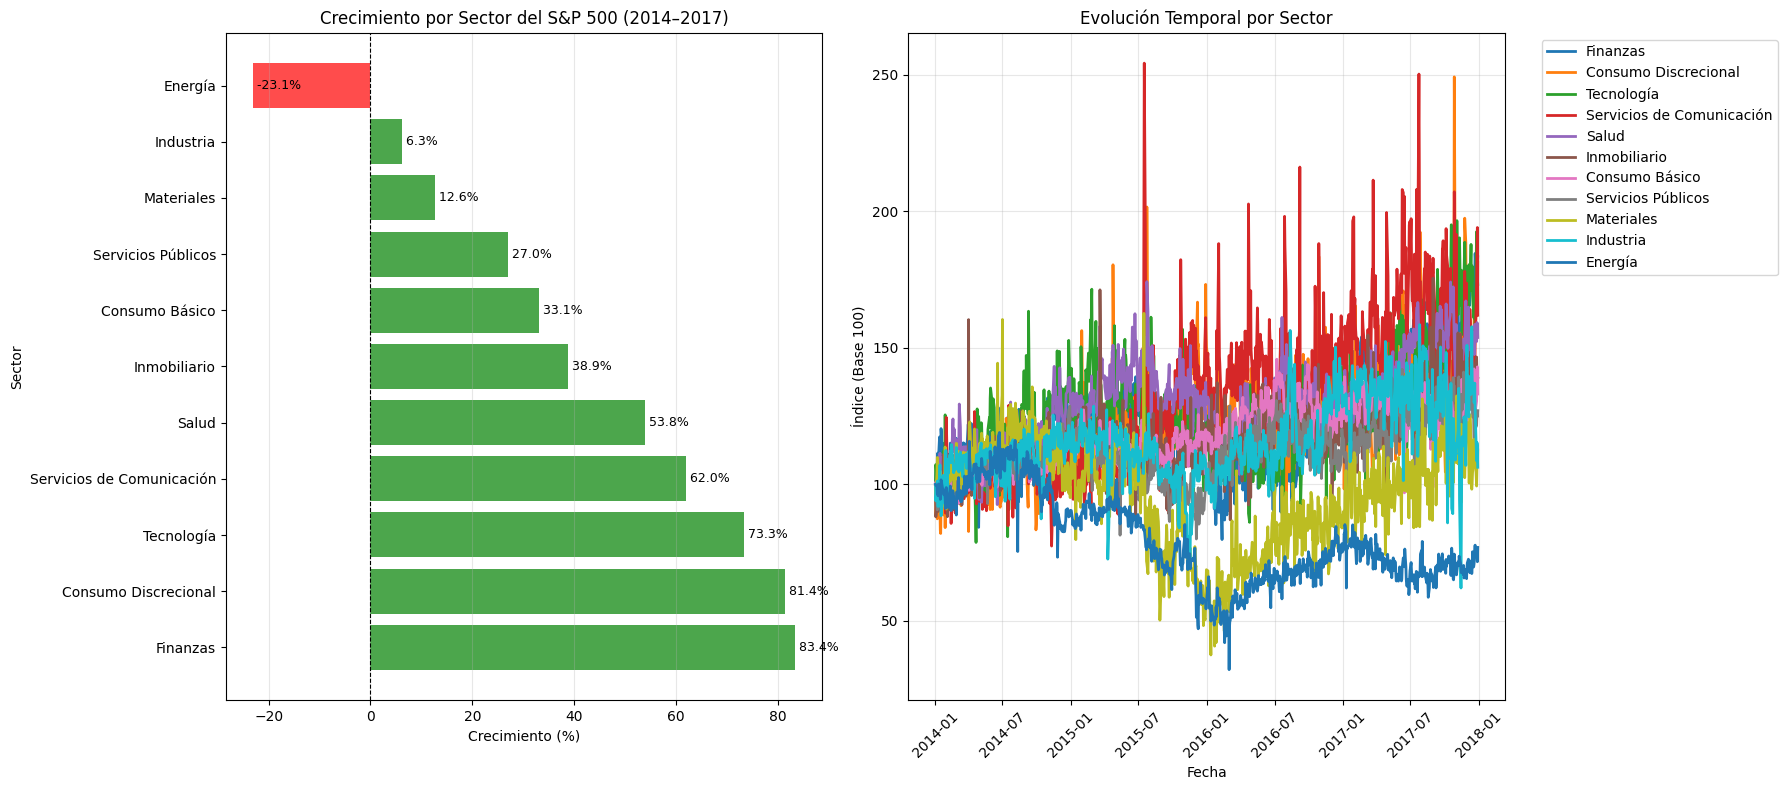

In [18]:
# Visualizar crecimiento por sector
fig1 = plot_sector_growth(sector_growth)
plt.show()

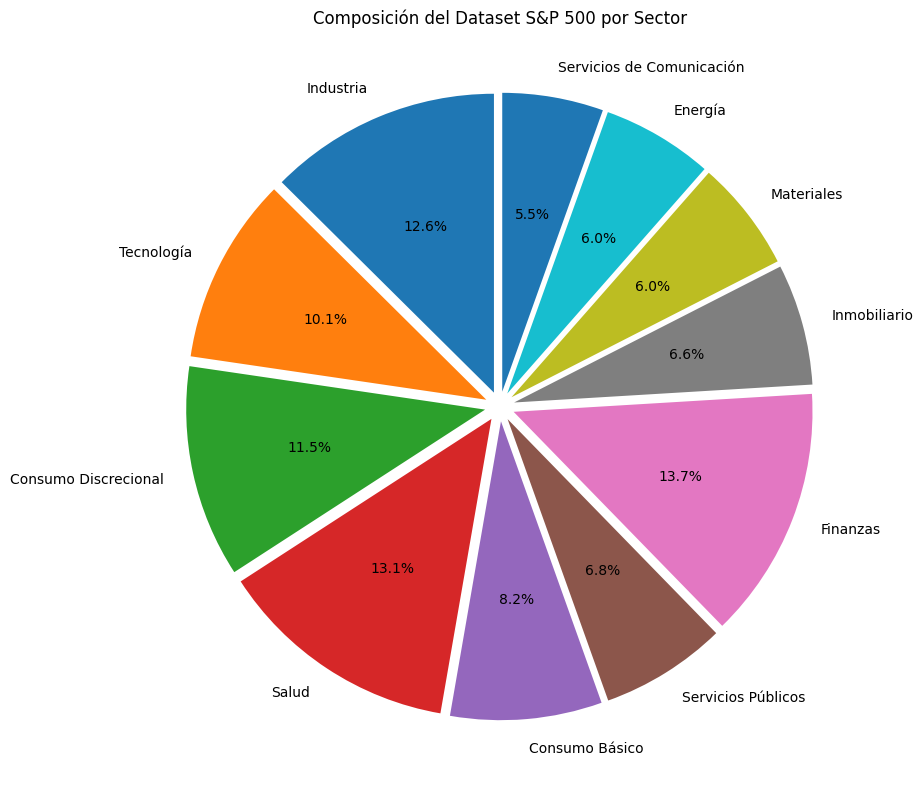


Observaciones:
- El sector Financiero (Finanzas) tuvo el mayor crecimiento durante 2014-2017
- El sector Energético fue el único con rendimiento negativo
- El sector Tecnológico mostró un crecimiento sólido y consistente


In [19]:
# Visualizar composición del dataset por sector
fig2 = plot_sector_composition(sector_dict)
plt.show()

print("\nObservaciones:")
print("- El sector Financiero (Finanzas) tuvo el mayor crecimiento durante 2014-2017")
print("- El sector Energético fue el único con rendimiento negativo")
print("- El sector Tecnológico mostró un crecimiento sólido y consistente")

## 8. Simulación de Inversión

Simulamos 2 estrategia de inversión consistente: invertir 100€ iniciales y 10€ diarios en cada empresa del S&P 500 durante el periodo 2014-2017. Esta estrategia de Dollar-Cost Averaging (DCA) nos permite analizar qué empresas habrían generado las mejores y peores rentabilidades.

### 8.1 Inversión 10 euros iniciales


C:\Users\yutsin\AppData\Local\Temp\ipykernel_39368\2916131309.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados = df.groupby('symbol').apply(calcular_retorno).reset_index()
C:\Users\yutsin\AppData\Local\Temp\ipykernel_39368\2916131309.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=top_10, x='valor_final', y='symbol', palette='magma')


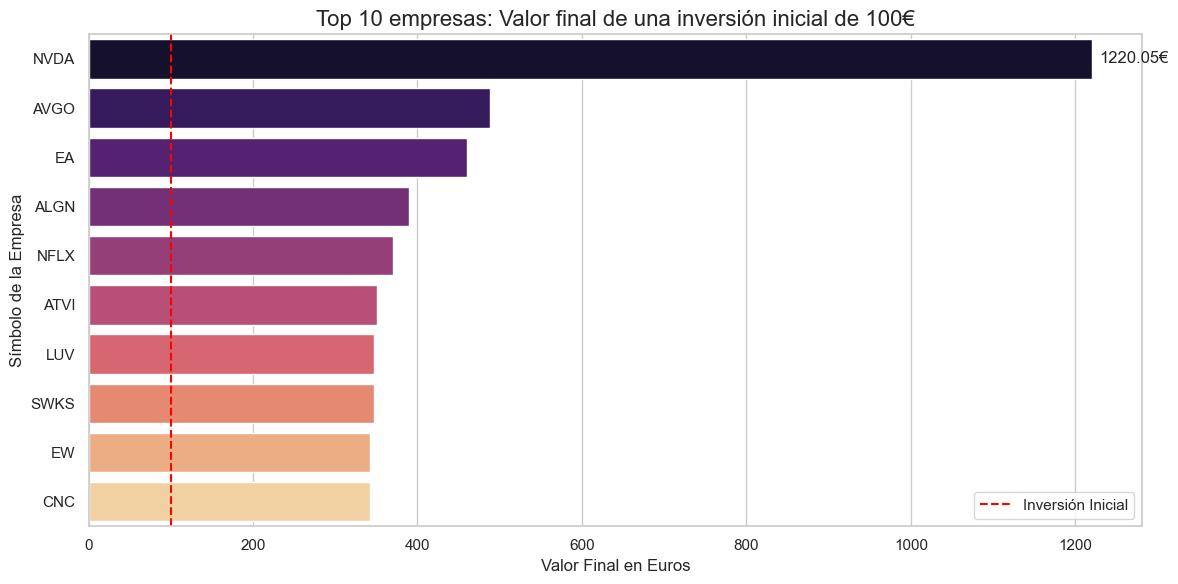

In [20]:

# 2. Asegurarnos de que la fecha sea tipo datetime y ordenar
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['symbol', 'date'])

# 3. Calcular el valor final de invertir 100€ por cada símbolo
def calcular_retorno(group):
    precio_inicial = group.iloc[0]['close']
    precio_final = group.iloc[-1]['close']
    valor_final = (100 / precio_inicial) * precio_final
    return valor_final

# Agrupamos por empresa y aplicamos la función
resultados = df.groupby('symbol').apply(calcular_retorno).reset_index()
resultados.columns = ['symbol', 'valor_final']

# 4. Obtener las 10 mejores para el gráfico
top_10 = resultados.sort_values(by='valor_final', ascending=False).head(10)

# 5. Visualización con Seaborn y Matplotlib
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

plot = sns.barplot(data=top_10, x='valor_final', y='symbol', palette='magma')

# Añadir etiquetas de los valores en las barras
plot.bar_label(plot.containers[0], fmt='%.2f€', padding=5)

plt.title('Top 10 empresas: Valor final de una inversión inicial de 100€', fontsize=16)
plt.xlabel('Valor Final en Euros', fontsize=12)
plt.ylabel('Símbolo de la Empresa', fontsize=12)

# Línea de referencia de los 100€ iniciales
plt.axvline(100, color='red', linestyle='--', label='Inversión Inicial')
plt.legend()

plt.tight_layout()
plt.show()



La gráfica muestra el valor final de una inversión inicial de 100 € realizada en distintas empresas entre los años 2014 y 2017. La línea roja discontinua indica la inversión inicial, lo que permite comparar fácilmente qué empresas superaron (o no) ese valor con el paso del tiempo.

Se observa que NVIDIA (NVDA) destaca de forma muy clara sobre el resto, alcanzando un valor final superior a 1.200 €, lo que indica un crecimiento excepcional durante este periodo. Esto refleja el fuerte aumento del valor de la empresa, impulsado principalmente por su liderazgo en el sector tecnológico y de semiconductores.

Otras empresas como AVGO (Broadcom) y EA (Electronic Arts) también muestran rendimientos muy positivos, multiplicando varias veces la inversión inicial, aunque a bastante distancia de NVIDIA. El resto de compañías (NFLX, ATVI, LUV, SWKS, EW y CNC) presentan crecimientos más moderados, situándose en un rango aproximado de 300 € a 400 €, lo que sigue siendo un buen rendimiento a largo plazo.

### 8.2 Inversión 10 euros diarios.

In [21]:
# Importar funciones de simulación
from src.investment_simulation import simulate_daily_investment, plot_top_winners_losers

# Ejecutar simulación
results = simulate_daily_investment(df, daily_investment=10)
results = results.sort_values('profit', ascending=False)

print("Resultados de la Simulación:")
print(f"Total invertido (todas las empresas): {results['total_invested'].sum():,.2f}€")
print(f"Valor final (todas las empresas): {results['final_value'].sum():,.2f}€")
print(f"Ganancia/Pérdida total: {results['profit'].sum():,.2f}€")
print(f"Retorno total: {(results['profit'].sum() / results['total_invested'].sum() * 100):.2f}%")

Resultados de la Simulación:
Total invertido (todas las empresas): 4,974,610.00€
Valor final (todas las empresas): 6,359,696.74€
Ganancia/Pérdida total: 1,385,086.74€
Retorno total: 27.84%


In [22]:
# Mostrar top ganadores y perdedores
print("\nTop 10 Empresas con Mayores Ganancias:")
print(results.head(10)[['symbol', 'total_invested', 'final_value', 'profit', 'profit_percentage']].to_string(index=False))

print("\nTop 10 Empresas con Mayores Pérdidas:")
print(results.tail(10)[['symbol', 'total_invested', 'final_value', 'profit', 'profit_percentage']].to_string(index=False))


Top 10 Empresas con Mayores Ganancias:
symbol  total_invested  final_value       profit  profit_percentage
  NVDA           10070 61562.815127 51492.815127         511.348710
  ALGN           10070 30708.544554 20638.544554         204.950790
   AMD           10070 27291.619870 17221.619870         171.019065
  AMZN           10070 22783.920288 12713.920288         126.255415
  NFLX           10070 21973.995458 11903.995458         118.212467
  LRCX           10070 21879.313354 11809.313354         117.272228
  AMAT           10070 21382.628389 11312.628389         112.339905
  AVGO           10070 21216.540752 11146.540752         110.690574
  ATVI           10070 20958.244964 10888.244964         108.125571
    BA           10070 20168.038552 10098.038552         100.278436

Top 10 Empresas con Mayores Pérdidas:
symbol  total_invested  final_value       profit  profit_percentage
    GE           10070  6533.656278 -3536.343722         -35.117614
     M           10070  6483.291423 -

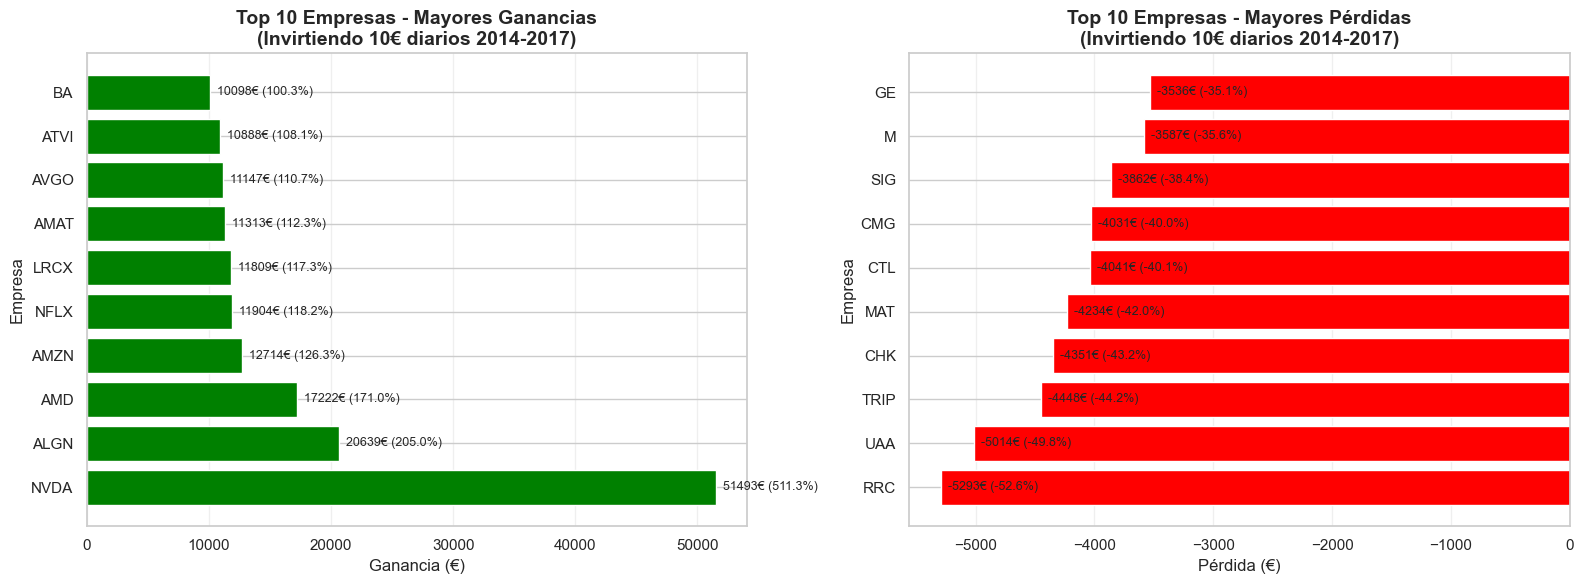


Conclusión de la Simulación:
La estrategia de inversión diaria constante (DCA) habría sido altamente rentable
para la mayoría de las empresas del S&P 500 durante este periodo de crecimiento económico.


In [23]:
# Visualizar comparación
fig_investment = plot_top_winners_losers(results)
plt.show()

print("\nConclusión de la Simulación:")
print("La estrategia de inversión diaria constante (DCA) habría sido altamente rentable")
print("para la mayoría de las empresas del S&P 500 durante este periodo de crecimiento económico.")

## 9. Conclusiones

Este análisis del S&P 500 durante el periodo 2014-2017 nos ha permitido:

1. **Identificar empresas ganadoras y perdedoras**: Hemos determinado qué símbolos tuvieron los mejores y peores rendimientos acumulados durante el periodo.

2. **Analizar la relación riesgo-retorno**: Confirmamos que, en general, las empresas con mayores rendimientos también presentan mayor volatilidad, lo cual es consistente con la teoría financiera.

3. **Evaluar sectores económicos**: El sector Financiero lideró el crecimiento, mientras que el sector Energético experimentó caídas significativas.

4. **Simular estrategias de inversión**: La estrategia de Dollar-Cost Averaging demostró ser efectiva para la mayoría de las empresas durante este periodo alcista del mercado.

5. **Utilizar herramientas analíticas**: Pandas y NumPy nos permitieron realizar cálculos eficientes y generar visualizaciones claras para interpretar los datos.

**Limitaciones del análisis:**
- El periodo analizado (2014-2017) fue generalmente alcista, por lo que los resultados pueden no ser representativos de otros periodos
- No se consideraron costos de transacción, impuestos ni comisiones
- El análisis es retrospectivo y no garantiza resultados futuros